In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Amreli NRM data for model building2.csv')
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output'],
      dtype='object')

In [7]:
effprev = []

campaigns = np.unique(df['campaign'])
for i in campaigns:
    dfc = df[df['campaign']==i].reset_index(drop=True)
    effprev.append(0)
    for j in range(1, dfc.shape[0]):
        effprev.append(dfc['Efficiency (MT/KWH)'][j-1])


effprev = np.array(effprev)

df['Previous Efficiency'] = effprev

In [6]:
df.to_csv('Amreli NRM data for model building3.csv',index=False)

In [ ]:
inprev = []
outprev = []

campaigns = np.unique(df['campaign'])
for i in campaigns:
    dfc = df[df['campaign']==i].reset_index(drop=True)
    inprev.append(0)
    outprev.append(0)
    for j in range(1, dfc.shape[0]):
        inprev.append(dfc['Input (MT)'][j-1])
        outprev.append(dfc['Output (MT)'][j-1])


inprev = np.array(inprev)
outprev = np.array(outprev)

df['Previous Input'] = inprev
df['Previous Output'] = outprev

In [7]:
df.to_csv('Amreli NRM data for model building2.csv',index=False)

In [85]:
lbh = []
lah = []

campaigns = np.unique(df['campaign'])

for i in campaigns:
    dfc = df[df['campaign']==i]
    nheats = dfc.shape[0]
    a = np.linspace(6.75, 3.916667, nheats+1)
    for j in range(len(a)-1):
        lbh.append(a[j])
    for k in range(1,len(a)):
        lah.append(a[k])
        
lbh = np.array(lbh)
lah = np.array(lah)

df['Refractory lining before heating'] = lbh
df['Refractory lining after heating'] = lah

In [86]:
df = df.drop(['Refractory lining'], axis=1)
df

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),Output (MT),Input energy (KWH),Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating
0,1,1.0,130.0,0.0,39.467073,0,0.280,39.747073,0.201,1693.0,32.643,25950.00985,3728.0,273.0,3728.0,15.066000,0.001258,0.0,6.750000,6.687037
1,1,2.0,135.0,11.0,23.531707,0,0.390,34.921707,0.204,1685.0,30.466,20315.33812,3740.0,274.0,3740.0,13.540444,0.001500,0.0,6.687037,6.624074
2,1,3.0,125.0,12.0,19.678049,0,0.394,32.072049,0.203,1633.0,28.290,17880.32673,3731.0,275.0,3731.0,13.579200,0.001582,0.0,6.624074,6.561111
3,1,4.0,110.0,12.0,16.956098,0,0.450,29.406098,0.192,1686.0,26.114,16040.34170,3764.0,270.0,3764.0,14.244000,0.001628,0.0,6.561111,6.498148
4,1,5.0,115.0,13.0,17.032927,0,0.495,30.527927,0.196,1689.0,27.202,17353.32549,3756.0,274.0,3756.0,14.192348,0.001568,0.0,6.498148,6.435185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,9,59.0,130.0,0.0,34.835366,0,0.635,35.470366,0.249,1679.0,29.200,18231.02000,3366.0,362.0,3366.0,13.476923,0.001602,8.0,4.141535,4.096561
445,9,60.0,110.0,0.0,31.128049,0,0.585,31.713049,0.236,1652.0,26.110,15492.62960,3498.0,328.0,3498.0,14.241818,0.001685,6.0,4.096561,4.051588
446,9,61.0,105.0,0.0,30.079268,0,0.365,30.444268,0.212,1650.0,25.030,15293.33000,3428.0,351.0,3428.0,14.302857,0.001637,8.0,4.051588,4.006614
447,9,62.0,145.0,0.0,37.487805,0,0.710,38.197805,0.226,1701.0,31.450,19974.52400,3210.0,368.0,3210.0,13.013793,0.001575,8.0,4.006614,3.961641


vprev = [0]
fprev = [0]
rprev = [0]

for i in range(1,df.shape[0]):
    vprev.append(df['Voltage'][i-1])
    fprev.append(df['Frequency'][i-1])
    rprev.append(df['Rating of the furnace (KW)'][i-1])
vprev = np.array(vprev)
fprev = np.array(fprev)
rprev = np.array(rprev)

df['Previous Voltage'] = vprev
df['Previous Frequency'] = fprev
df['Previous Rating of the Furnace'] = rprev

In [87]:
vprev = []
fprev = []
rprev = []

campaigns = np.unique(df['campaign'])
for i in campaigns:
    dfc = df[df['campaign']==i].reset_index(drop=True)
    vprev.append(0)
    fprev.append(0)
    rprev.append(0)
    for j in range(1, dfc.shape[0]):
        vprev.append(dfc['Voltage'][j-1])
        fprev.append(dfc['Frequency'][j-1])
        rprev.append(dfc['Rating of the furnace (KW)'][j-1])

vprev = np.array(vprev)
fprev = np.array(fprev)
rprev = np.array(rprev)

df['Previous Voltage'] = vprev
df['Previous Frequency'] = fprev
df['Previous Rating of the Furnace'] = rprev

In [88]:
df

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),...,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating,Previous Voltage,Previous Frequency,Previous Rating of the Furnace
0,1,1.0,130.0,0.0,39.467073,0,0.280,39.747073,0.201,1693.0,...,273.0,3728.0,15.066000,0.001258,0.0,6.750000,6.687037,0.0,0.0,0.0
1,1,2.0,135.0,11.0,23.531707,0,0.390,34.921707,0.204,1685.0,...,274.0,3740.0,13.540444,0.001500,0.0,6.687037,6.624074,3728.0,273.0,3728.0
2,1,3.0,125.0,12.0,19.678049,0,0.394,32.072049,0.203,1633.0,...,275.0,3731.0,13.579200,0.001582,0.0,6.624074,6.561111,3740.0,274.0,3740.0
3,1,4.0,110.0,12.0,16.956098,0,0.450,29.406098,0.192,1686.0,...,270.0,3764.0,14.244000,0.001628,0.0,6.561111,6.498148,3731.0,275.0,3731.0
4,1,5.0,115.0,13.0,17.032927,0,0.495,30.527927,0.196,1689.0,...,274.0,3756.0,14.192348,0.001568,0.0,6.498148,6.435185,3764.0,270.0,3764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,9,59.0,130.0,0.0,34.835366,0,0.635,35.470366,0.249,1679.0,...,362.0,3366.0,13.476923,0.001602,8.0,4.141535,4.096561,3403.0,314.0,3403.0
445,9,60.0,110.0,0.0,31.128049,0,0.585,31.713049,0.236,1652.0,...,328.0,3498.0,14.241818,0.001685,6.0,4.096561,4.051588,3366.0,362.0,3366.0
446,9,61.0,105.0,0.0,30.079268,0,0.365,30.444268,0.212,1650.0,...,351.0,3428.0,14.302857,0.001637,8.0,4.051588,4.006614,3498.0,328.0,3498.0
447,9,62.0,145.0,0.0,37.487805,0,0.710,38.197805,0.226,1701.0,...,368.0,3210.0,13.013793,0.001575,8.0,4.006614,3.961641,3428.0,351.0,3428.0


In [89]:
df.columns

Index(['campaign', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Voltage', 'Previous Frequency',
       'Previous Rating of the Furnace'],
      dtype='object')

In [90]:
cols = ['campaign', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)','Previous Voltage', 'Previous Frequency',
       'Previous Rating of the Furnace','Voltage', 'Frequency',
       'Rating of the furnace (KW)','Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating']

In [91]:
df = df[cols]
df

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),...,Previous Frequency,Previous Rating of the Furnace,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating
0,1,1.0,130.0,0.0,39.467073,0,0.280,39.747073,0.201,1693.0,...,0.0,0.0,3728.0,273.0,3728.0,15.066000,0.001258,0.0,6.750000,6.687037
1,1,2.0,135.0,11.0,23.531707,0,0.390,34.921707,0.204,1685.0,...,273.0,3728.0,3740.0,274.0,3740.0,13.540444,0.001500,0.0,6.687037,6.624074
2,1,3.0,125.0,12.0,19.678049,0,0.394,32.072049,0.203,1633.0,...,274.0,3740.0,3731.0,275.0,3731.0,13.579200,0.001582,0.0,6.624074,6.561111
3,1,4.0,110.0,12.0,16.956098,0,0.450,29.406098,0.192,1686.0,...,275.0,3731.0,3764.0,270.0,3764.0,14.244000,0.001628,0.0,6.561111,6.498148
4,1,5.0,115.0,13.0,17.032927,0,0.495,30.527927,0.196,1689.0,...,270.0,3764.0,3756.0,274.0,3756.0,14.192348,0.001568,0.0,6.498148,6.435185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,9,59.0,130.0,0.0,34.835366,0,0.635,35.470366,0.249,1679.0,...,314.0,3403.0,3366.0,362.0,3366.0,13.476923,0.001602,8.0,4.141535,4.096561
445,9,60.0,110.0,0.0,31.128049,0,0.585,31.713049,0.236,1652.0,...,362.0,3366.0,3498.0,328.0,3498.0,14.241818,0.001685,6.0,4.096561,4.051588
446,9,61.0,105.0,0.0,30.079268,0,0.365,30.444268,0.212,1650.0,...,328.0,3498.0,3428.0,351.0,3428.0,14.302857,0.001637,8.0,4.051588,4.006614
447,9,62.0,145.0,0.0,37.487805,0,0.710,38.197805,0.226,1701.0,...,351.0,3428.0,3210.0,368.0,3210.0,13.013793,0.001575,8.0,4.006614,3.961641


In [92]:
df.to_csv('Amreli NRM data for model building.csv',index=False)

In [79]:
df.columns

Index(['campaign', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Previous Voltage', 'Previous Frequency',
       'Previous Rating of the Furnace', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating'],
      dtype='object')

In [4]:
a = np.linspace(6.75, 3.916667,100)

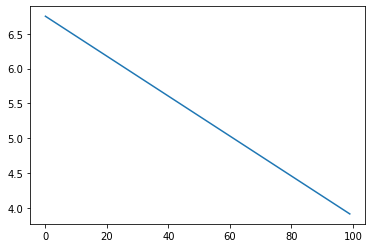

In [5]:
plt.plot(a)